In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/interrupcoes_clean.csv')

df.head()


,id_ocorrencia,data_abertura,data_fechamento,regiao,causa,clientes_afetados,status,duracao_min
0,1,2025-01-01 08:10:00,2025-01-01 10:20:00,Campinas,Temporal,120,Concluída,130.0
1,2,2025-01-02 14:35:00,2025-01-02 17:10:00,Sumaré,Equipamento,45,Concluída,155.0
2,3,2025-01-03 09:00:00,2025-01-03 12:30:00,Indaiatuba,Acidente,210,Concluída,210.0
3,4,2025-01-04 11:15:00,NaN,Campinas,Manutenção,80,Em atendimento,0.0
4,5,2025-01-05 07:55:00,2025-01-05 08:40:00,Hortolândia,Temporal,30,Concluída,45.0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_ocorrencia      6 non-null      int64  
 1   data_abertura      6 non-null      object 
 2   data_fechamento    4 non-null      object 
 3   regiao             6 non-null      object 
 4   causa              6 non-null      object 
 5   clientes_afetados  6 non-null      int64  
 6   status             6 non-null      object 
 7   duracao_min        6 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 512.0+ bytes


In [3]:
df.describe()


,id_ocorrencia,clientes_afetados,duracao_min
count,6.000000,6.000000,6.000000
mean,3.500000,105.833333,90.000000
std,1.870829,68.001225,87.692645
min,1.000000,30.000000,0.000000
25%,2.250000,53.750000,11.250000
50%,3.500000,100.000000,87.500000
75%,4.750000,142.500000,148.750000
max,6.000000,210.000000,210.000000


In [4]:
df.isnull().sum()


id_ocorrencia        0
data_abertura        0
data_fechamento      2
regiao               0
causa                0
clientes_afetados    0
status               0
duracao_min          0
dtype: int64

In [5]:
df['data_abertura'] = pd.to_datetime(df['data_abertura'])
df['data_fechamento'] = pd.to_datetime(df['data_fechamento'], errors='coerce')

df.head()


,id_ocorrencia,data_abertura,data_fechamento,regiao,causa,clientes_afetados,status,duracao_min
0,1,2025-01-01 08:10:00,2025-01-01 10:20:00,Campinas,Temporal,120,Concluída,130.0
1,2,2025-01-02 14:35:00,2025-01-02 17:10:00,Sumaré,Equipamento,45,Concluída,155.0
2,3,2025-01-03 09:00:00,2025-01-03 12:30:00,Indaiatuba,Acidente,210,Concluída,210.0
3,4,2025-01-04 11:15:00,NaT,Campinas,Manutenção,80,Em atendimento,0.0
4,5,2025-01-05 07:55:00,2025-01-05 08:40:00,Hortolândia,Temporal,30,Concluída,45.0


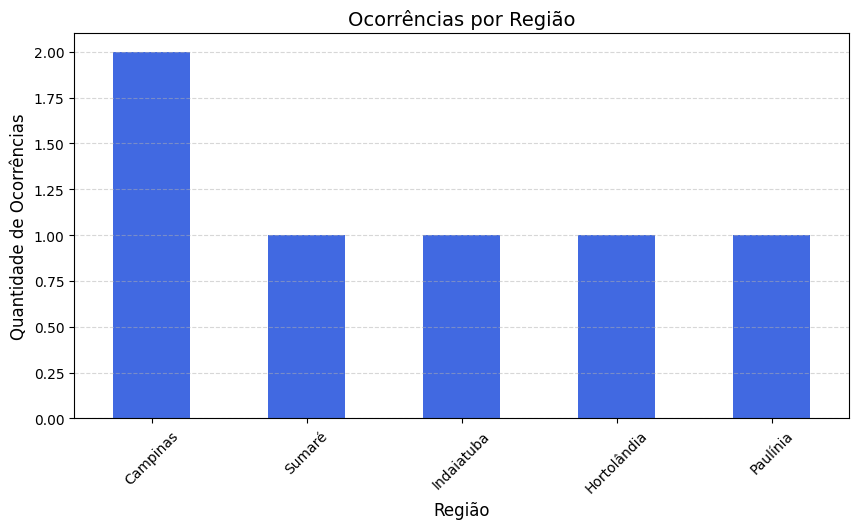

In [6]:
# Contagem de ocorrências por região
ocorrencias_regiao = df['regiao'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
ocorrencias_regiao.plot(kind='bar', color='royalblue')

plt.title('Ocorrências por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Quantidade de Ocorrências', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


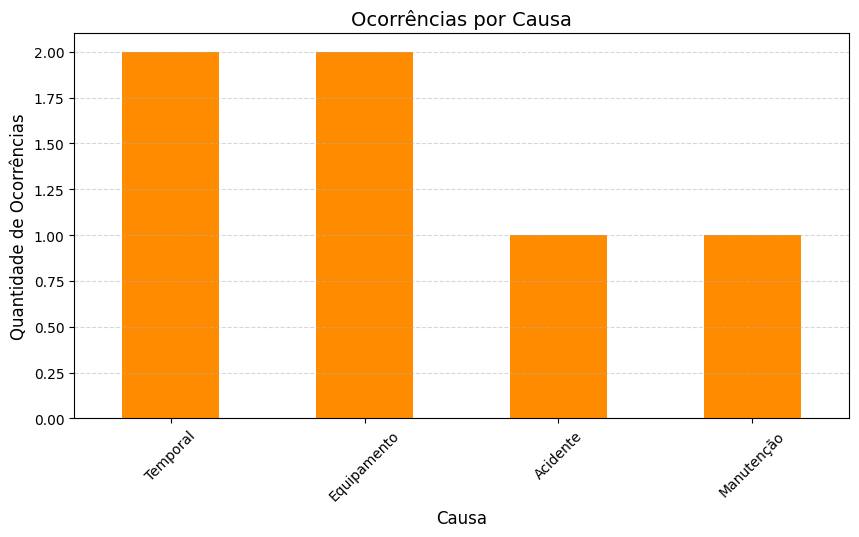

In [7]:
# Contagem por causa da interrupção
causas = df['causa'].value_counts()

plt.figure(figsize=(10,5))
causas.plot(kind='bar', color='darkorange')

plt.title('Ocorrências por Causa', fontsize=14)
plt.xlabel('Causa', fontsize=12)
plt.ylabel('Quantidade de Ocorrências', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


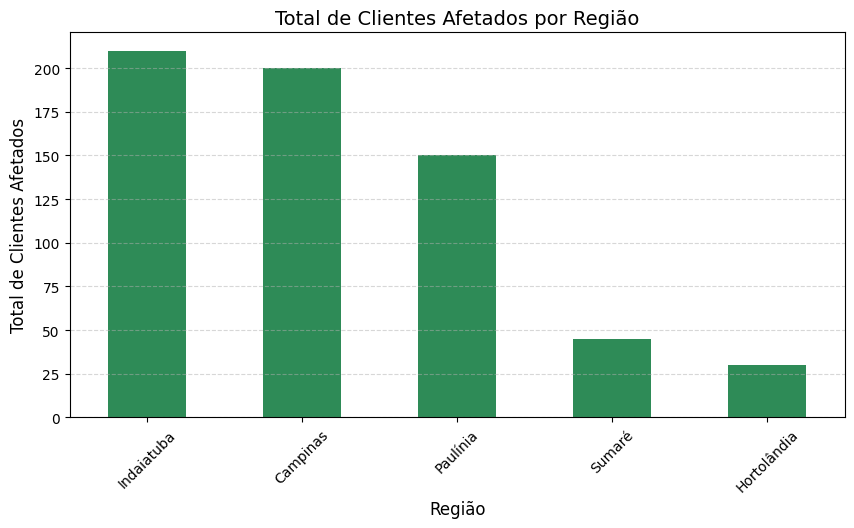

In [8]:
impacto_regiao = df.groupby('regiao')['clientes_afetados'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
impacto_regiao.plot(kind='bar', color='seagreen')

plt.title('Total de Clientes Afetados por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Total de Clientes Afetados', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


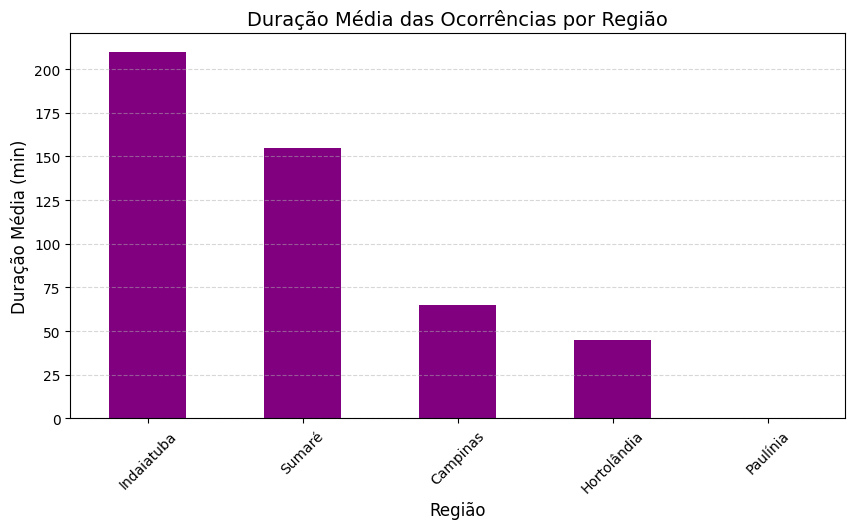

In [9]:
duracao_media = df.groupby('regiao')['duracao_min'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
duracao_media.plot(kind='bar', color='purple')

plt.title('Duração Média das Ocorrências por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Duração Média (min)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


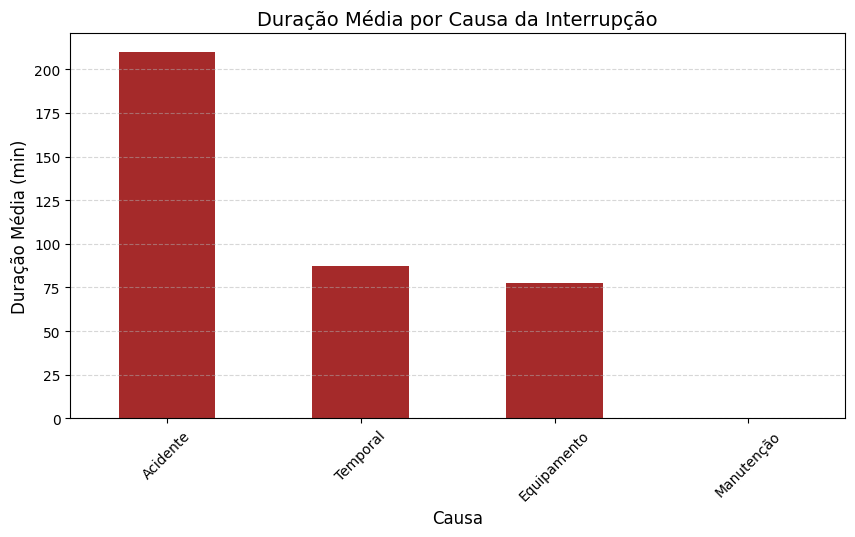

In [10]:
duracao_por_causa = df.groupby('causa')['duracao_min'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
duracao_por_causa.plot(kind='bar', color='brown')

plt.title('Duração Média por Causa da Interrupção', fontsize=14)
plt.xlabel('Causa', fontsize=12)
plt.ylabel('Duração Média (min)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


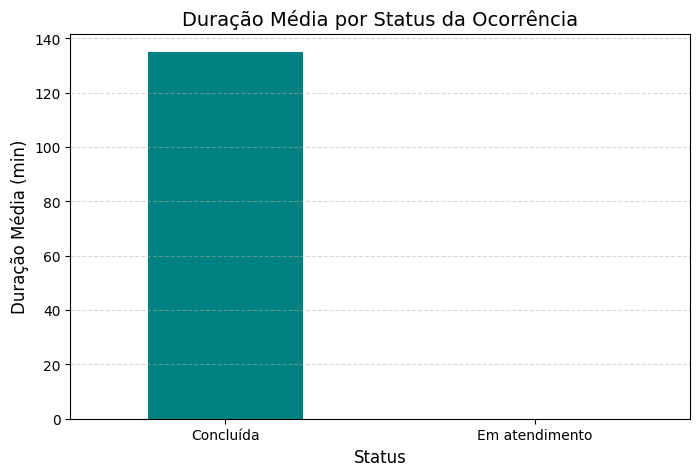

In [11]:
duracao_status = df.groupby('status')['duracao_min'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
duracao_status.plot(kind='bar', color='teal')

plt.title('Duração Média por Status da Ocorrência', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Duração Média (min)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


📝 Resumo Executivo — Análise de Interrupções de Energia (CPFL Energy Analytics)

A análise das interrupções registradas no período permitiu identificar padrões relevantes para suporte operacional, priorização de equipes e entendimento das causas mais críticas.

🔍 1. Distribuição das Interrupções

As regiões com maior número de ocorrências foram Indaiatuba e Campinas, sugerindo concentração de eventos nessas localidades.

Regiões como Hortolândia e Sumaré apresentaram menor frequência, porém ainda com impacto relevante.

⚠️ 2. Causas Mais Frequentes

As principais causas identificadas foram:

Temporal

Equipamento

Acidente

Manutenção

Destaque:

Temporal e Equipamento aparecem como causas recorrentes em várias regiões.

Acidentes apresentam os maiores tempos médios de resolução.

👥 3. Impacto em Clientes

Indaiatuba e Campinas tiveram o maior número de clientes afetados.

Paulínia e Hortolândia apresentaram impactos menores, porém ainda significativos dependendo da causa do evento.

⏱️ 4. Duração das Ocorrências

A causa Acidente representa, em média, as ocorrências mais longas, ultrapassando 200 minutos.

Temporal apresenta impacto intermediário em duração.

Manutenção tende a ter menor tempo médio, por ser planejada ou de menor risco.

🧩 5. Status das Ocorrências

Ocorrências Concluídas apresentam duração média de aproximadamente 140 minutos.

Ocorrências ainda Em atendimento possuem tempo menor, pois estão em andamento (tendência natural).

📌 Principais Insights Operacionais

Regiões de maior impacto devem receber atenção prioritária na alocação de equipes.

Acidentes exigem planos de resposta mais robustos devido ao alto tempo médio.

Temporal e equipamento representam causas recorrentes — podendo indicar necessidade de reforço de infraestrutura.

Monitoramento contínuo desses indicadores ajuda a reduzir DEC/FEC e melhorar qualidade do serviço.

🎯 Conclusão

Este estudo oferece uma visão clara e consolidada das interrupções, permitindo:

Identificação de regiões críticas

Entendimento das causas mais impactantes

Suporte à tomada de decisão

Priorização de recursos operacionais
